<a href="https://colab.research.google.com/github/nandinib1999/edureka-assignments/blob/main/Demo_Emotion_Detection_using_Tensorflow_2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Emotion Detection using Tensorflow 2.x**

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

##**Problem Statement**

Human emotion recognition plays a vital role in the interpersonal relationship. The automatic identification of emotions has been an active research topic since the early eras. Emotions are reflected from speech, hand, and gestures of the body and through facial expressions. As a human, I am sure; for most of you, it must be an easy task to judge a person by his emotion and communicate with them. But what if you want the machine to talk similarly by analyzing the feeling. Just as a human extracting and understanding the emotions, it is equally essential for the machine to understand the sentiment and then interact/respond to the human. So as part of this project, let us try to resolve one of the issues and predict the emotion of a person using his facial features in real-time.


##**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Recognize each face based on the emotion shown in the facial expression into one of seven categories (0=**Angry**, 1=**Disgust**, 2=**Fear**, 3=**Happy**, 4=**Sad**, 5=**Surprise**, 6=**Neutral**)
  - Import Required Libraries
  - Prepare the dataset for the model
  - Develop CNN model for recognizing facial expression of the images
  - Analyse the model summary
  - Fit the basic CNN model
  - Save the model & load the saved weight to test the model
  - Predict the facial expression of the uploaded image
- Use OpenCV and Haar Cascade File to check the emotion in real time



##**Dataset Description**



To download the Fer Dataset [Click Here!!](https://www.kaggle.com/deadskull7/fer2013/download)

fer2013 is an open-source dataset, first created for an ongoing project by Pierre-Luc Carrier and Aaron Courville, then shared publicly for a Kaggle competition, shortly before ICML 2013. 
This dataset consists of 35,887 grayscale, 48x48 sized face images with 7 different emotions, all labelled.

**Fer.csv** contains two columns, **emotion** and **pixels**. 

The **emotion** column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. 

The **pixels** column contains a string surrounded in quotes for each image 

**Classes:** 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

![alt text](https://i.imgur.com/4UGNOie.png)


####**Skills Gained**

 TensorFlow 2.x 
- Convolutional Neural Network (CNN) implementation
- Load the pretrained model
- OpenCV


# **Solution:** Facial Expression Recognition using CNN on Tensorflow 2.x

##**Importing Required Libraries**

In [4]:
import tensorflow as tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.optimizers import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print('Tensorflow Version:',tensorflow.__version__)

Tensorflow Version: 2.4.1


## <b> Load the  Dataset

In [48]:
# Loading the Dataset

label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df = pd.read_csv('/content/drive/MyDrive/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head()

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training


## **Prepare the dataset for the model**

In [49]:
# Loading the Dataset

label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df = pd.read_csv('/content/drive/MyDrive/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head()

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training


In [50]:
filname = '/content/drive/MyDrive/fer2013.csv'

# Images are of 48x48 pixels
# No. of Images = 35887

def getData(filname):
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [51]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [52]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1) #Reshaping the images present in the dataset

In [53]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [54]:
print(X_train.shape)
print(y_train.shape)

(32298, 48, 48, 1)
(32298, 7)


###**Develop CNN model for recognizing facial expression of the images**

In [11]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))#64 neurons with 5*5 filter
    #This class allows to create convolutional neural network to extract feature from the images
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))#MaxPooling2D helps to reduce the size of the data

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))#MaxPooling2D helps to reduce the size of the data

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))#MaxPooling2D helps to reduce the size of the data

    model.add(Flatten())#Converts multi dimensional array to 1D channel
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu')) #relu activation function added to remove the negative values
    model.add(Dropout(0.2)) #Used to prevent a model from overfitting
    model.add(Dense(7)) #output layer
    model.add(Activation('softmax')) #softmax activation function
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    
    return model
model=my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

###**Fit the basic CNN Model**

In [14]:
import tensorflow.keras.backend as K

model=my_model() # create the model
K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True)

Epoch 1/20
505/505 [==============================] - 72s 81ms/step - loss: 1.8193 - accuracy: 0.2968 - val_loss: 1.4595 - val_accuracy: 0.4335
Epoch 2/20
505/505 [==============================] - 39s 77ms/step - loss: 1.3394 - accuracy: 0.4863 - val_loss: 1.5331 - val_accuracy: 0.4074
Epoch 3/20
505/505 [==============================] - 39s 77ms/step - loss: 1.1217 - accuracy: 0.5742 - val_loss: 1.1757 - val_accuracy: 0.5517
Epoch 4/20
505/505 [==============================] - 39s 76ms/step - loss: 0.9746 - accuracy: 0.6374 - val_loss: 1.0787 - val_accuracy: 0.6002
Epoch 5/20
505/505 [==============================] - 39s 76ms/step - loss: 0.8553 - accuracy: 0.6852 - val_loss: 1.0949 - val_accuracy: 0.5999
Epoch 6/20
505/505 [==============================] - 38s 76ms/step - loss: 0.7149 - accuracy: 0.7404 - val_loss: 1.2427 - val_accuracy: 0.5673
Epoch 7/20
505/505 [==============================] - 39s 76ms/step - loss: 0.5556 - accuracy: 0.8088 - val_loss: 1.2341 - val_accuracy:

In [ ]:
#Categories of Facial Expressions

objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

In [73]:
#A Fucntion for visualizing the Facial Expression Recognition Results

def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.title('Emotion')
    
plt.show()

**Deep Learning** models can take hours, days and even weeks to train

That's why, we are going to use a pre-trained model



In [ ]:
#Uploding the model file onto the Google Co-Lab Platform
from google.colab import files
files.upload()

Saving model_filter.h5 to model_filter.h5


##**Using the model_filter.h5 file to predict Facial Expressions**

In [ ]:
from numpy import loadtxt
from keras.models import load_model
 
# Loading the Model
model = load_model('model_filter.h5')#Loding the pre-trained model file

# Model Summary
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      

###**Uploading Images onto Google Colab Platform for Facial Expression Recognition**

In [ ]:
from google.colab import files
files.upload()

Saving neutral.jpg to neutral.jpg


{'neutral.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\xf0\x00\xf0\x00\x00\xff\xed\x1eFPhotoshop 3.0\x008BIM\x03\xed\x00\x00\x00\x00\x00\x10\x00\xf0\x00\x00\x00\x01\x00\x01\x00\xf0\x00\x00\x00\x01\x00\x018BIM\x04\x04\x00\x00\x00\x00\x00\x1f\x1c\x01Z\x00\x03\x1b%G\x1c\x02\x00\x00\x02\x00\x04\x1c\x02P\x00\x0bScott Eaton\x008BIM\x04\x0c\x00\x00\x00\x00\x1d\xc5\x00\x00\x00\x01\x00\x00\x00\xcd\x00\x00\x01\x00\x00\x00\x02h\x00\x02h\x00\x00\x00\x1d\xa9\x00\x18\x00\x01\xff\xd8\xff\xdb\x00\x84\x00\x06\x04\x04\x04\x05\x04\x06\x05\x05\x06\t\x06\x05\x06\t\x0b\x08\x06\x06\x08\x0b\x0c\n\n\x0b\n\n\x0c\x10\x0c\x0c\x0c\x0c\x0c\x0c\x10\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x01\x07\x07\x07\r\x0c\r\x18\x10\x10\x18\x14\x0e\x0e\x0e\x14\x14\x0e\x0e\x0e\x0e\x14\x11\x0c\x0c\x0c\x0c\x0c\x11\x11\x0c\x0c\x0c\x0c\x0c\x0c\x11\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0

###**Predict the Facial Expression of an Image**

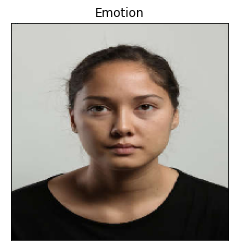

Expression Prediction: Neutral


In [ ]:
from skimage import io
import warnings
warnings.filterwarnings("ignore")

img = image.load_img('neutral.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('neutral.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
 #print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.xticks([])
plt.yticks([])

plt.show()

objects = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])
        

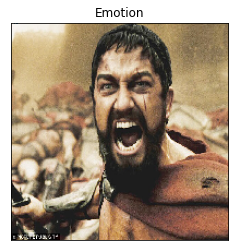

Expression Prediction: Surprise


In [ ]:
from skimage import io
import warnings
warnings.filterwarnings("ignore")

img = image.load_img('angry.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('angry.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
 #print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.xticks([])
plt.yticks([])

plt.show()

objects = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])
        

##**Use OpenCV and Haar Cascade File to check the emotion in real time**


In [ ]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)


In [ ]:
#Save this code as file_name.py
#Save the fer.json file, model_filter.h5 file, and this code in the same folder
#Run it in your local system to recognize facial expression in real-time. 
#You can use Pycharm or Anaconda CLI to execute this section

import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

#load model
model = model_from_json(open("fer.json", "r").read())
#load weights
model.load_weights('model_filter.h5')


face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows()

# DIY: Assignment

####**Total Marks: 50**
**Duration: 6 days**

As a part of this assignment following are the list of task that may help  improve your skills with CNN and TensorFlow. It is important to get hands-on experience with CNN in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.


###**`.ipynb file 1`** 


**Marks: 10**
- Do you get the exact same results if you run the Notebook multiple times without changing any parameters?
- What is the effect of adding more neurons to each Conv2D layer?
- What happens if we manipulate the value of dropout?
- What is the effect of adding more activation layers to the network?
- What is the purpose of MaxPooling2D layer?
- Does manipulating the learning rate affect the model? Justify your answer.


### **Answers**

- Sometimes the results are same, sometimes they are not!
- By adding more neurons to Conv2D layer may lead to a very dense model. While it is more powerful, the chances of model overfitting the data is very high. That's why we should be very careful while adding the extra neurons to the CNN.
- The value of dropout can be manipulated in two ways: Increase: We may end up dropping too many neurons making the network too weak to learn. Leads to underfitting.
Decrease: The value may be too low with neglible effect on the denseness of the network. Ultimately leads to overfitting.
- Adding more activation layers such as ReLU can lead to increase in the non-linearity of the model. While it is mostly desirable as more non-linear the model will be more complex features it will be able to extract, understand and learn. However, it will depend on the kind-of data given as input to the model.
- Purpose of MaxPooling2D layer is to reduce the spatial dimensions of the image features returned from the convolutional layer. This process is also known as "downsampling". Although there is some minor loss of information, downsampling helps in reducing the computational overhead and work against overfitting.
- Yes, manipulating the learning rate affects the training of the model greatly. The learning rate defines the size of step a model takes at the time of gradient descent. If the lr is too small, the model may take forever to converge. If the lr is too large, the gradients may end up fluctuating a lot.

###**`.ipynb file 2`** 


**Marks: 15**
- Try improving the model and re-code the program from scratch without looking too much at this source-code.
- Write up a summary explaining how your program works.


In [55]:
# Loading the Dataset
import pandas as pd

label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
df = pd.read_csv('/content/drive/MyDrive/fer2013.csv', na_filter=False)
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [19]:
df.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [35]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.layers import Activation, Flatten
from keras.layers import Input, Reshape, Dense, Dropout
from keras.layers import Conv2D, BatchNormalization
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam

In [24]:
num_classes = len(label_map)
num_classes

7

In [56]:
train_df = df[df['Usage'] == 'Training']
val_df = df[df['Usage'] == 'PublicTest']
test_df = df[df['Usage'] == 'PrivateTest']

print("train: ", train_df.shape[0])
print("val: ", val_df.shape[0])
print("test: ", test_df.shape[0])

train:  28709
val:  3589
test:  3589


In [64]:
X_train = train_df['pixels'].tolist()
X_train = [np.array(val.split(' '), 'float32') for val in X_train]
X_train = np.array(X_train) / 255.0

X_val = val_df['pixels'].tolist()
X_val = [np.array(val.split(' '), 'float32') for val in X_val]
X_val = np.array(X_val) / 255.0

X_test = test_df['pixels'].tolist()
X_test = [np.array(val.split(' '), 'float32') for val in X_test]
X_test = np.array(X_test) / 255.0

In [65]:
N, D = X_train.shape
print(N, D)
X_train = X_train.reshape(N, 48, 48, 1) #Reshaping the images present in the dataset
print(X_train.shape)

N, D = X_val.shape
print(N, D)
X_val = X_val.reshape(N, 48, 48, 1) #Reshaping the images present in the dataset
print(X_val.shape)

N, D = X_test.shape
print(N, D)
X_test = X_test.reshape(N, 48, 48, 1) #Reshaping the images present in the dataset
print(X_test.shape)

28709 2304
(28709, 48, 48, 1)
3589 2304
(3589, 48, 48, 1)
3589 2304
(3589, 48, 48, 1)


In [66]:
y_train = train_df['emotion'].tolist()
y_train = np.array([keras.utils.to_categorical(emotion, num_classes) for emotion in y_train]).astype(np.float32)

y_val = val_df['emotion'].tolist()
y_val = np.array([keras.utils.to_categorical(emotion, num_classes) for emotion in y_val]).astype(np.float32)

y_test = test_df['emotion'].tolist()
y_test = np.array([keras.utils.to_categorical(emotion, num_classes) for emotion in y_test]).astype(np.float32)

In [67]:
y_train.shape

(28709, 7)

In [36]:
lr = 0.001
dropout_rate = 0.3

In [38]:
inputs = Input((48, 48, 1))
conv1 = Conv2D(kernel_size=[5, 5], strides=1, filters=32, padding='same')(inputs)
bn1 = BatchNormalization()(conv1)
conv1_2 = Conv2D(kernel_size=[5, 5], strides=1, filters=32, padding='same')(bn1)
bn1_2 = BatchNormalization()(conv1_2)
act_1 = Activation('relu')(bn1_2)
pool1 = MaxPooling2D(pool_size=[2, 2], strides=2)(act_1)
dropout_1 = Dropout(rate=dropout_rate)(pool1)

conv2 = Conv2D(kernel_size=[5, 5], strides=1, filters=64, padding='same')(dropout_1)
bn2 = BatchNormalization()(conv2)
conv2_2 = Conv2D(kernel_size=[5, 5], strides=1, filters=64, padding='same')(bn2)
bn2_2 = BatchNormalization()(conv2_2)
act_2 = Activation('relu')(bn2_2)
pool2 = MaxPooling2D(pool_size=[2, 2], strides=2)(act_2)
dropout_2 = Dropout(rate=dropout_rate)(pool2)

conv3 = Conv2D(kernel_size=[3, 3], strides=1, filters=128, padding='same')(dropout_2)
bn3 = BatchNormalization()(conv3)
conv3_2 = Conv2D(kernel_size=[3, 3], strides=1, filters=128, padding='same')(bn3)
bn3_2 = BatchNormalization()(conv3_2)
act_3 = Activation('relu')(bn3_2)
pool3 = MaxPooling2D(pool_size=[2, 2], strides=2)(act_3)
dropout_3 = Dropout(rate=dropout_rate)(pool3)

conv4 = Conv2D(kernel_size=[3, 3], strides=1, filters=128, padding='same')(dropout_3)
bn4 = BatchNormalization()(conv4)
conv4_2 = Conv2D(kernel_size=[3, 3], strides=1, filters=128, padding='same')(bn4)
bn4_2 = BatchNormalization()(conv4_2)
act_4 = Activation('relu')(bn4_2)
pool4 = MaxPooling2D(pool_size=[2, 2], strides=2)(act_4)
dropout_4 = Dropout(rate=dropout_rate)(pool4)
flatten = GlobalAveragePooling2D()(pool4)
dense = Dense(units=1024)(flatten)
logits = Dense(num_classes, activation='softmax')(dense)
model = Model(inputs=inputs, outputs=logits)

In [39]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_214 (Conv2D)          (None, 48, 48, 32)        832       
_________________________________________________________________
batch_normalization_208 (Bat (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_215 (Conv2D)          (None, 48, 48, 32)        25632     
_________________________________________________________________
batch_normalization_209 (Bat (None, 48, 48, 32)        128       
_________________________________________________________________
activation_198 (Activation)  (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 24, 24, 32)        0     

In [ ]:
opt = Adam(lr=lr)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
history = model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=30, 
            verbose=1, 
            validation_data=(X_val, y_val),
            shuffle=True)

Epoch 1/30
449/449 [==============================] - 24s 49ms/step - loss: 1.8811 - accuracy: 0.2417 - val_loss: 1.7302 - val_accuracy: 0.3291
Epoch 2/30
449/449 [==============================] - 21s 47ms/step - loss: 1.5383 - accuracy: 0.4010 - val_loss: 1.4304 - val_accuracy: 0.4433
Epoch 3/30
449/449 [==============================] - 21s 47ms/step - loss: 1.3696 - accuracy: 0.4719 - val_loss: 1.3438 - val_accuracy: 0.4804
Epoch 4/30
449/449 [==============================] - 21s 47ms/step - loss: 1.2961 - accuracy: 0.5056 - val_loss: 1.2554 - val_accuracy: 0.5227
Epoch 5/30
449/449 [==============================] - 21s 47ms/step - loss: 1.2476 - accuracy: 0.5262 - val_loss: 1.3094 - val_accuracy: 0.5015
Epoch 6/30
449/449 [==============================] - 21s 47ms/step - loss: 1.1967 - accuracy: 0.5444 - val_loss: 1.2085 - val_accuracy: 0.5467
Epoch 7/30
449/449 [==============================] - 21s 47ms/step - loss: 1.1753 - accuracy: 0.5577 - val_loss: 1.2756 - val_accuracy:

In [69]:
eval_results = model.evaluate(x=X_test, y=y_test, verbose=1)
print(eval_results)

113/113 [==============================] - 2s 12ms/step - loss: 0.9952 - accuracy: 0.6411
[0.9951857328414917, 0.6411256790161133]


In [76]:
from skimage import io
import warnings
warnings.filterwarnings("ignore")

def predict_image(img_path):
  img = image.load_img(img_path, grayscale=True, target_size=(48, 48))
  show_img=image.load_img(img_path, grayscale=False, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  x /= 255

  custom = model.predict(x)

  x = np.array(x, 'float32')
  x = x.reshape([48, 48]);

  plt.gray()
  plt.imshow(show_img)
  plt.xticks([])
  plt.yticks([])

  plt.show()

  objects = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

  m=-9999
  a=custom[0]
  for i in range(0,len(a)):
      if a[i]>m:
          m=a[i]
          ind=i
          
  print('Expression Prediction:',objects[ind])

In [77]:
from google.colab import files
fn = files.upload()

Saving neutral.jpg to neutral.jpg
Saving sad.jpg to sad.jpg
Saving disgusted-face.jpg to disgusted-face.jpg
Saving surprised.jpeg to surprised.jpeg
Saving angry.jpg to angry.jpg
Saving happily-surprised.jpg to happily-surprised.jpg


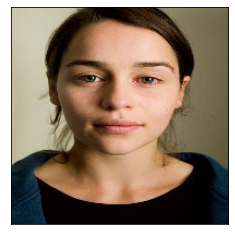

Expression Prediction: Surprise


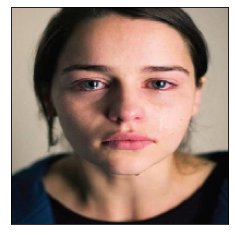

Expression Prediction: Happy


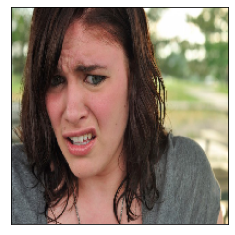

Expression Prediction: Fear


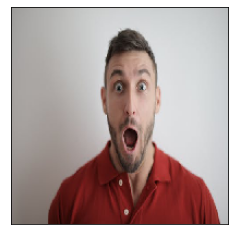

Expression Prediction: Sad


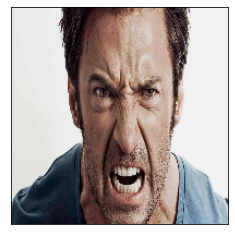

Expression Prediction: Angry


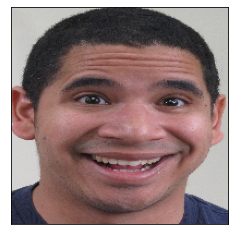

Expression Prediction: Happy


In [79]:
for f in fn.keys():
  file_name = f
  predict_image(file_name)

###**`.ipynb file 3`** 


**Marks: 25**

**Problem Statement**<br>

UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old)

The objective is to -
- **PS 1** - Classify each face based on Gender using Convolutoional Neural Networks on Tensorflow 2.x

- **PS 2** - Use OpenCV & Haar Cascade File to check the gender in real time


**Dataset Description**
- **Total Images**: The dataset consists of over 20,000 Face Images 

- The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, gender detection, age progression/regression, landmark localization, etc.

- You will be using **Aligned & Cropped Faces** Dataset from the UTKFace Dataset
 

**Tasks to be performed**

- Import Required Libraries
- Prepare the dataset for the model
- Develop CNN model for recognizing the gender
- Analyse the model summary
- Fit the basic CNN model
- Save the model & load the saved weight to test the model
- Predict the gender of the uploaded image
- Use OpenCV and Haar Cascade File to check the gender in real time



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

In [ ]:
!unzip "/content/drive/MyDrive/UTKFace.zip"

Archive:  /content/drive/MyDrive/UTKFace.zip
replace UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import cv2

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def preprocess(path, img_w, img_h, data="train"):
    img = cv2.imread(path)
    if data == "test":
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      faces = face_cascade.detectMultiScale(gray, 1.1, 4)
      for (x, y, w, h) in faces:
          img_roi = img[y:y + h, x:x + w]
          if img_roi.shape[0] != 0 and img_roi.shape[1] != 0:
            img = img_roi

    if img is not None:
      img = cv2.resize(img, (img_w, img_h), interpolation = cv2.INTER_AREA)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = img.astype(np.float32)
      img /= 255
    else:
      print("IMAGE ERROR::: SKIPPPEDDDD ... ", path)
    return img

In [ ]:
def get_image_label_df(folder_path):
  lst_image_label = []
  for file_name in tqdm(os.listdir(folder_path), total=len(os.listdir(folder_path))):
    file_path = os.path.join(folder_path, file_name)
    split_ls = file_name.split('_')
    gender_label = split_ls[1]
    lst_image_label.append([file_path, gender_label])
  df = pd.DataFrame(lst_image_label, columns=["image_path", "gender"])
  return df, lst_image_label

In [ ]:
BASE_DIR = "/content"
DATASET_DIR = "UTKFace"

In [ ]:
df, images_labels = get_image_label_df(os.path.join(BASE_DIR, DATASET_DIR))

100%|██████████| 23693/23693 [00:00<00:00, 440408.98it/s]


/content/UTKFace/49_1_1_20170112235151889.jpg.chip.jpg


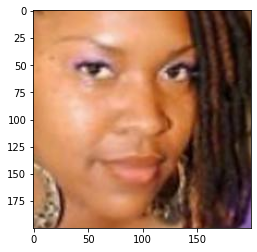

In [ ]:
print(images_labels[0][0])
img = cv2.imread(images_labels[0][0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

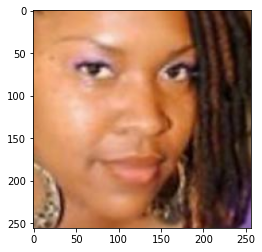

In [ ]:
img = preprocess(images_labels[0][0], 256, 256)
plt.imshow(img)
plt.show()

In [ ]:
BATCH_SIZE = 64
IMG_W = 256
IMG_H = 256
EPOCHS = 35

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.1, random_state=42, shuffle=True)
print(train_df.shape, test_df.shape)
print(train_df.columns)

(21323, 2) (2370, 2)
Index(['image_path', 'gender'], dtype='object')


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15, horizontal_flip=True)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    directory=os.path.join(BASE_DIR, DATASET_DIR),
                                                    x_col="image_path",
                                                    y_col="gender",
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical",
                                                    target_size=(IMG_W, IMG_H),
                                                    subset='training',
                                                    shuffle=True
                                                    )

Found 18125 validated image filenames belonging to 2 classes.


In [ ]:
valid_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    directory=os.path.join(BASE_DIR, DATASET_DIR),
                                                    x_col="image_path",
                                                    y_col="gender",
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical",
                                                    target_size=(IMG_W, IMG_H),
                                                    subset='validation',
                                                    shuffle=True
                                                    )

Found 3198 validated image filenames belonging to 2 classes.


### Simple CNN

In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(256,256,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
print(STEP_SIZE_TRAIN,STEP_SIZE_VALID)

283 49


In [ ]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=EPOCHS,
                              verbose=1).history

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
283/283 [==============================] - 98s 222ms/step - loss: 1.2842 - accuracy: 0.6722 - val_loss: 0.4550 - val_accuracy: 0.8221
Epoch 2/35
283/283 [==============================] - 59s 209ms/step - loss: 0.4187 - accuracy: 0.8100 - val_loss: 0.3640 - val_accuracy: 0.8517
Epoch 3/35
283/283 [==============================] - 59s 209ms/step - loss: 0.3720 - accuracy: 0.8328 - val_loss: 0.3409 - val_accuracy: 0.8511
Epoch 4/35
283/283 [==============================] - 57s 201ms/step - loss: 0.3519 - accuracy: 0.8406 - val_loss: 0.3282 - val_accuracy: 0.8479
Epoch 5/35
283/283 [==============================] - 64s 225ms/step - loss: 0.3414 - accuracy: 0.8488 - val_loss: 0.2967 - val_accuracy: 0.8648
Epoch 6/35
283/283 [==============================] - 59s 208ms/step - loss: 0.3174 - accuracy: 0.8550 - val_loss: 0.3045 - val_accuracy: 0.8603
Epoch 7/35
283/283 [==============================] - 61s 214ms/step - loss: 0.3191 - accuracy: 0.8545 - val_loss: 0.2819 - val_ac

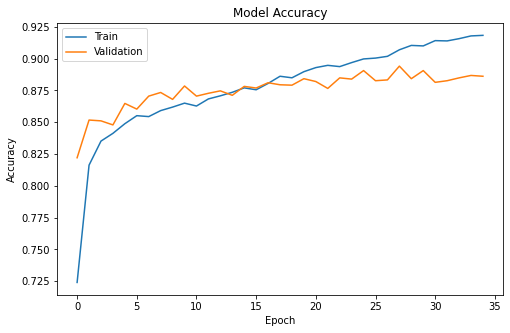

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  directory = os.path.join(BASE_DIR, DATASET_DIR),
                                                  x_col="image_path",
                                                  target_size=(IMG_H, IMG_W),
                                                  batch_size=1,
                                                  shuffle=False,
                                                  class_mode=None)

Found 2370 validated image filenames.


In [ ]:
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
test_preds = model.predict_generator(test_generator, steps=STEP_SIZE_TEST,verbose = 1)
test_labels = [np.argmax(pred) for pred in test_preds]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


2370/2370 [==============================] - 9s 4ms/step


In [ ]:
true_labels = test_df['gender'].tolist()
true_labels = [int(x) for x in true_labels]

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

print("Accuracy for test: ", round(accuracy_score(true_labels, test_labels), 3))
print("Recall for test: ", round(recall_score(true_labels, test_labels), 3))
print("Precision for test: ", round(precision_score(true_labels, test_labels), 3))
print("------------------------------")
print("Classification Report")
print(classification_report(true_labels, test_labels))

Accuracy for test:  0.895
Recall for test:  0.919
Precision for test:  0.865
------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1266
           1       0.86      0.92      0.89      1104

    accuracy                           0.90      2370
   macro avg       0.90      0.90      0.90      2370
weighted avg       0.90      0.90      0.90      2370



In [ ]:
labels = ["Male", "Female"]

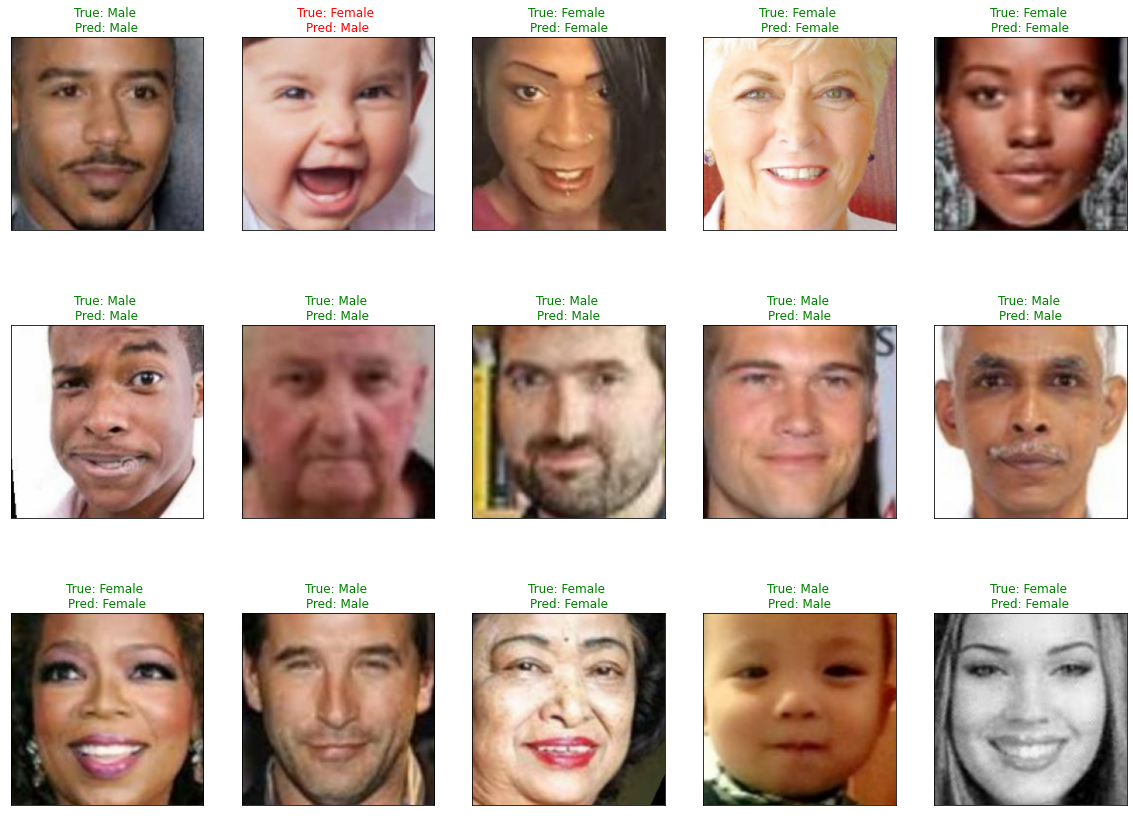

In [ ]:
figure = plt.figure(figsize=(20, 15))
for i, index in enumerate(np.random.choice(test_df.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    img = preprocess(test_df.iloc[index, 0], 256, 256)
    ax.imshow(img)
    predict_index = true_labels[index]
    true_index = test_labels[index]
    # Set the title for each image
    title_color = ("green" if predict_index == true_index else "red")
    ax.set_title("True: {} \nPred: {}".format(labels[predict_index], labels[true_index]), color=title_color)
plt.show()

In [ ]:
model.save("gender_pred.h5")

In [ ]:
model_load = tf.keras.models.load_model("/content/gender_pred.h5")

In [ ]:
# A DataFrameIterator yielding tuples of (x, y) where x is a numpy array 
# containing a batch of images with shape (batch_size, *target_size, channels) 
# and y is a numpy array of corresponding labels.
def predict_image(filepath):
  img = preprocess(filepath, 256, 256, "test")
  img_pr = np.expand_dims(img, 0)
  pred = model_load.predict(img_pr)
  pred_ind = np.argmax(pred)
  pred_label = labels[pred_ind]
  plt.imshow(img)
  plt.title("Pred: {}".format(pred_label))
  plt.axis('off')
  plt.show()

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 140345.jpg to 140345 (3).jpg
Saving 1200px-MJK_08781_Robert_Pattinson_(Damsel,_Berlinale_2018).jpg to 1200px-MJK_08781_Robert_Pattinson_(Damsel,_Berlinale_2018) (3).jpg
Saving Jeon_Yeo-Bin-1989-p-01.jpg to Jeon_Yeo-Bin-1989-p-01 (3).jpg
User uploaded file "140345.jpg" with length 122636 bytes
User uploaded file "1200px-MJK_08781_Robert_Pattinson_(Damsel,_Berlinale_2018).jpg" with length 314232 bytes
User uploaded file "Jeon_Yeo-Bin-1989-p-01.jpg" with length 238065 bytes


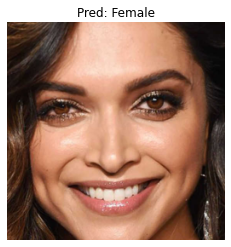

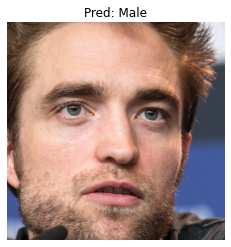

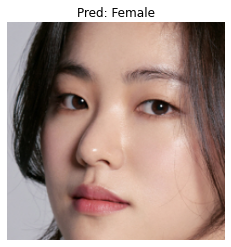

In [ ]:
for fn in uploaded.keys():
  file_name = fn
  predict_image(file_name)

In [ ]:
import cv2
import numpy as np
import tensorflow as tf


model_load = tf.keras.models.load_model("gender_pred.h5")

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
      continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    faces_detected = face_cascade.detectMultiScale(gray_img, 1.32, 5)
    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=2)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        img_pixels = cv2.cvtColor(roi_gray, cv2.COLOR_GRAY2RGB)
        img_pixels = cv2.resize(img_pixels, (256, 256))
        img_pixels = img_pixels.astype(np.float32)
        img_pixels /= 255
        img_pixels = np.expand_dims(img_pixels, axis = 0)

        predictions = model_load.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        gender = ('male', 'female')
        predicted_gender = gender[max_index]

        cv2.putText(test_img, predicted_gender, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 1)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Gender Prediction ', resized_img)

    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows